# **NO-SHOWS APOINTMENT DATA EXPLORATION**

## BY: CHARITY DIOH

##  **Introduction**

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not 
  patients show up for their appointment. A number of characteristics about the patient are included in each row.
    
### Here is a list of all column names on this dataset
> Client ID, Appoinment ID, Gender, Scheduled day, Appointment Day, Age, Neighbourhood, Scholarship, Hipertension, Diabetes,
  Hipertension, Alcoholism, Handicap, SMS_received, No-show.

### Here are the significances of the columns

> *Patient ID*: Identification of a patient
    
> *Appointment ID*: Identification of each appointment
    
> *Gender*: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

> *Scheduled Day*: tells us on what day the patient set up their appointment.
    
> *Neighborhood*: indicates the location of the hospital.

> *Age*: How old is the patient.

>  *Hipertension*: True or False

>  *Diabetes*: True or False

>  *Alcoholism*: True or False

>  *Handcap*: True or False

>  *SMS_received*: 1 or more messages sent to the patient.

>  *No-show*: True or False.

> *Scholarship*: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

    > **Key Point**

> Encoding of the last column (Scholarship): it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## **Preliminary Wrangling**

> The first thing thing we do before running any code in this noebook would be importing the neccessary packages needed for this analysis.

In [1]:
# importing statements for all the packages i plan to use

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


> The next step is loading the dataset we are working on.

In [2]:
## Load the data and print out a few lines

df = pd.read_csv("C:/Users/ADMIN/Desktop/Charity/PROJECT 3/noshowappointments-kagglev2-may-2016 (1).csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Now, we have our dataset, we would like to confirm the number of rows and columns in this dataset

In [3]:
# Confirming the number of columns and rows
df.shape

(110527, 14)

> The next crucial step is to check for errors in our dataset and then fix them. We check for errors like missing values, wrong data types, duplicates, outliers.

In [4]:
# Checking for wrong data types 

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> From the above data, we can see that most of our columns have the correct data types. Except columns like Scheduled Day and Appointment Day. These 2 columns ought to have a datetime date time datatype not the object data type. Hence, we need to fix this. 

In [5]:
# Checking for missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> From the above data, we can also see that there are no missing values

In [6]:
# Checking for duplicates

df.duplicated().sum()

0

> There are no duplicate values

## **Data Cleaning**

> In this step of data cleaning, we fix every error detected, so that these errors do not intefere with our analysis. 

> Let us start by dropping columns which are not relevant to our analysis.

In [7]:
# drop columns not relevant to us from this dataset
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# confirm changes
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Once, we drop these columns,we can also run a check on our dataset, to confirm our rows and columns. Initially we had 14 columns, we just dropped 2 columns, so we are exepceted to have 12 columns now.

In [8]:
# Confirming the rows and columns
df.shape

(110527, 12)

> We can also rename some of our column names with 2 letter word to a proper code standard names by adding an underscore between these 2 words.

In [9]:
# renaming columns
df.rename(columns={'ScheduledDay' : 'Scheduled_Day', 'AppointmentDay' : 'Appointment_Day', 'No-show' : 'No_show', 'Handcap' : 'Handicap', 'Hipertension' : 'Hypertension'}, inplace=True)

# confirming changes
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Now we can fix our data types errors namely Scheduled day and Appointment day having an object datatype, we fix them by converting their data type to a datetime data type. 

In [10]:
# fixing our datatype
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])

#confirming changes
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# fixing our datatype
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

# confirming changes
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
#confirming that the datatypes has been fixed

df.dtypes

Gender                          object
Scheduled_Day      datetime64[ns, UTC]
Appointment_Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hypertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handicap                         int64
SMS_received                     int64
No_show                         object
dtype: object

In [13]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# converting the columns some of the columns with 0 and 1, to True and False. 
qual_var = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']

df[qual_var] = df[qual_var].astype(bool)
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No


In [15]:
df.shape

(110527, 12)

In [16]:
# Storing our cleaned data
df.to_csv('C:/Users/ADMIN/Desktop/Charity/PROJECT 3/no-show-cleaned.csv', index=False)

### **What is the structure of your dataset?**
There are 110,527 patients in the dataset with 12 features (Gender, Scheduled_Day, Appointement_Day, Age, neighbourhood, Scholarship, Hypertension, Diabetes, Alcohoism, Handicap, SMS_received, No_Show). Most variables are categorical in nature, but the variable Age is numeric in nature.

### **What is/are the main feature(s) of interest in your dataset?**
I'm most interested in figuring out what features best for predicting the reasons why patients do not show up for their doctor's appointment.

### **What features in the dataset do you think will help support your investigation into your feature(s) of interest?**
I expect that SMS received, Handicap and scholarship will have the strongest effect on each patient's ability to show up for their appointment. I also think that the other variables like Alcoholism, Diabetes, hypertension would also have effects on the availalility of the patients.

> Now that we are done fixing and accessing our data, we can proceed with our Data Exploration.

### **UNIVARIATE EXPLORATION**

> I will start by looking at the descripitive statisics of the dataset to have a clearer understanding of the datset.

In [17]:
## Load the clean data and print out a few lines

df = pd.read_csv("C:/Users/ADMIN/Desktop/Charity/PROJECT 3/no-show-cleaned.csv")

df.head()


,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No


In [18]:
# Descriptive Statistics for each column of data

df.describe()

,Age,Handicap
count,110527.000000,110527.000000
mean,37.088874,0.022248
std,23.110205,0.161543
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


> The Mean of the age is around 37. The maximum age is 115 and minimum is -1, these seem like an outlier, but in this case i wouldnt consider them as an outlier, we could actually have someone with the age of 115 and i feel -1 represents the age of the unborn babies. We can see that handicap falls in betwwen 0 and 4.

> I will be picking out the No_show column. I would like to check the unique values in this column. 

In [19]:
#this returns the unique values in the No_show column

df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

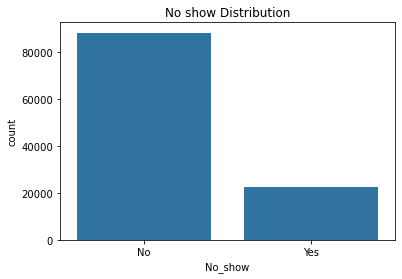

In [20]:
#plotting a count plot for the No show column

base_color = sns.color_palette()[0]
sns.countplot(data = df, x ='No_show', color=base_color,).set(title ='No show Distribution');

> From this barchart, its a either a Yes or No. so its either the patient showed up to the appointment represented by a 'NO' or the patient did not show up reperesented by a 'Yes'.

> So, lets find out the number of patients that showed up and the ones that didn't show up.

> The barchart clearly shows that less than 50% of the entire population did not show up for the appointment. 
Now, that I know the number of persons that showed up or did not show up. I can filter my dataset to reflect only those who did not show up for their appointment. Since they are my patients of interest in this analysis. We will call this dataframe 'Did_Not_Show_up'.

In [21]:
# filtering and creating a dataframe to reflect only the YES in the No_show column

Did_Not_show_up = df[df['No_show'] == 'Yes']


I will be looking at the distribution of the variables

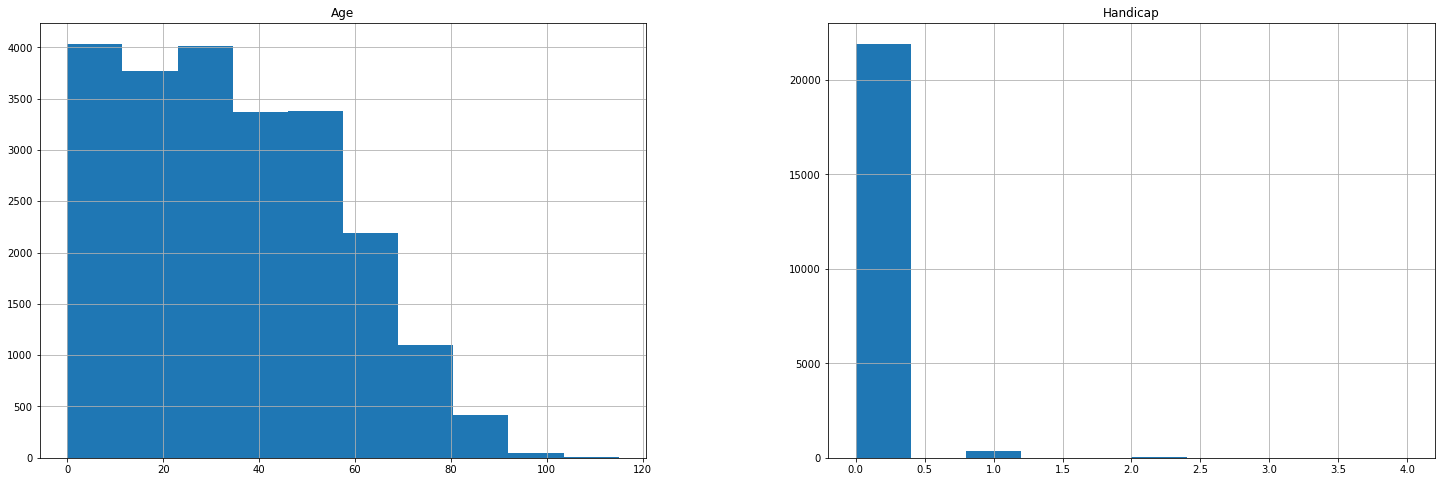

In [22]:
# plotting a histogram to look at the ditribution of the variables

Did_Not_show_up.hist(figsize=(25,8));

The greater population of the patients are between ages 0 to 50, with Age 0 having the highest occurence. This Age (0) I consider to be the age of Newborns. The Handicap distribution is already showing us a category of 0 to 4. With the highest occurence at 0, in my opinion, i consider this to be the population without disabilities.  (1,2,3,4) each of these numbers denote the number of disability a patient has.

I would like to look at the descriptive statistics of my new data frame

In [23]:
Did_Not_show_up.describe()

,Age,Handicap
count,22319.000000,22319.000000
mean,34.317667,0.020297
std,21.965941,0.156670
min,0.000000,0.000000
25%,16.000000,0.000000
50%,33.000000,0.000000
75%,51.000000,0.000000
max,115.000000,4.000000


> The Mean of the age is around 34. The maximum age is 115 and minimum is now 0, no longer -1. We can also see that handicap falls in betwwen 0 and 4.

Lets further look at the Age variable on a larger scale to see if we can get further inisghts

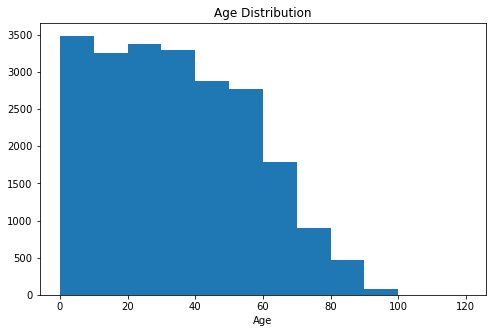

In [24]:
# plotting Age on a standard scale
binsize = 10
bins = np.arange(0, Did_Not_show_up['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Did_Not_show_up, x = 'Age', bins = bins)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.show()

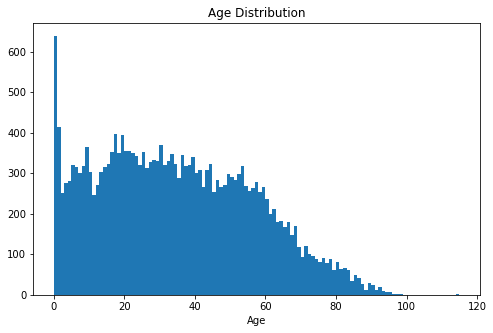

In [25]:
# investigating further on an even smaller bin size
binsize = 1
bins = np.arange(0, Did_Not_show_up['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Did_Not_show_up, x = 'Age', bins = bins)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

> The distribution shows a very high peak for Age 0. The Newborns have shown to constitute a greater part of the population. Ages 1 to 20 constitute about 50% of the the population. As the age is increasing , their population reduces. 

Lets further look at my variables of interest.  Could SMS received, scholarship and Handicap be a contributing factor to people not showing up to the appointement? How?


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


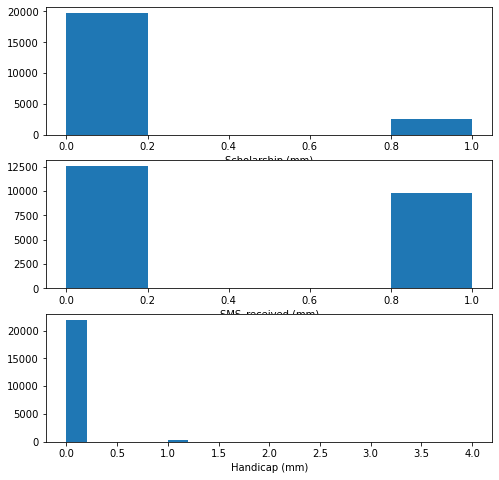

In [26]:
# plotting the distribution of Scholarship, SMS received, Handicap

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['Scholarship', 'SMS_received', 'Handicap']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(Did_Not_show_up[var]), max(Did_Not_show_up[var])+0.2, 0.2)
    ax[i].hist(data = Did_Not_show_up, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show();


> The above bar charts shows that more than 80% of the population are not benefic0ificiaries of the Bolsa program (a govt funded poverty alleviation program), less thsn 20% are not benefiicaries. More than 80% of the population did not receievd the SMS, and about 70% received the SMS. Handicap has 0 to 4 categories based on the nature of their disabilities.

### **Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations**

> The No show distribution shows a gap between those who showed up to the appointment and those that did not show up. From the distibution we can see that about 80% of the patient population showed up while about 20% of them did not show up for their apointment.

### **Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

> For the Age variable I had -1 as minimum value. After filtering my dataset, it was removed and my minimum value became 0. 

### **Bivariate Exploration**

>To start off with, I want to look at the pairwise relationships present between features in the data.

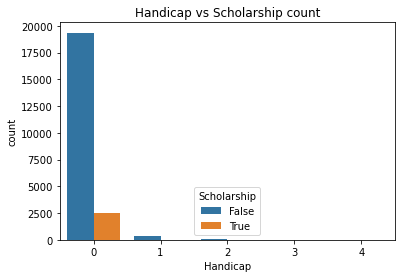

In [27]:
# plotting a handicap vs scholarship countplpot
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'Scholarship').set(title ='Handicap vs Scholarship count');

> From the bar chart above, we can see that a greater part of the patient population are not handicapped, yet they are not on scholarship as well. Less than 30% of the population of the Non handicap population are beneficiaries of the scholarship. This scholarship aims at alleviating poverty, by providing financial aid to the families. Hence those are not beneficiaries, obviously wouldnt have money to go for their hospital appointments.

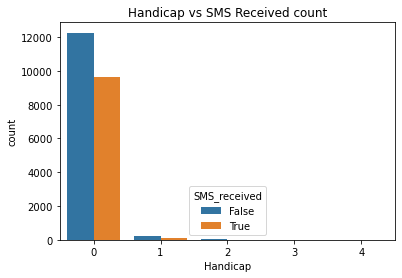

In [28]:
# plotting a handicap vs sms received countplot
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'SMS_received').set(title ='Handicap vs SMS Received count');

> This chart shows us that more than 90% of the population are without any form of disability. In this non handicap population, the number of persons that did not receive the SMS is about 30% greater than those that received the sms. Also for those with disabilities, just a few number of them received the sms. A lot of them did not rceive the sms.

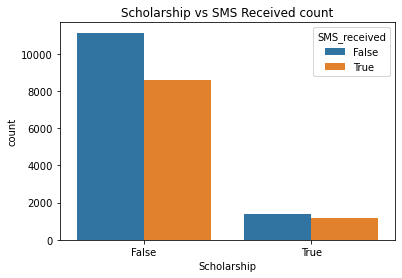

In [29]:
#plotting scholarship vs sms received countplot
sns.countplot(data = Did_Not_show_up, x = 'Scholarship', hue = 'SMS_received').set(title ='Scholarship vs SMS Received count');

We can also see the same type of relationship existing between SMS received and handicapped playing out here.  This chart shows us that more than 90% of the population are not beneficiaries of the scholarship program. In this Non beneficiary population, the number of persons that did not receive the SMS is about 30% greater than those that receive the SMS.

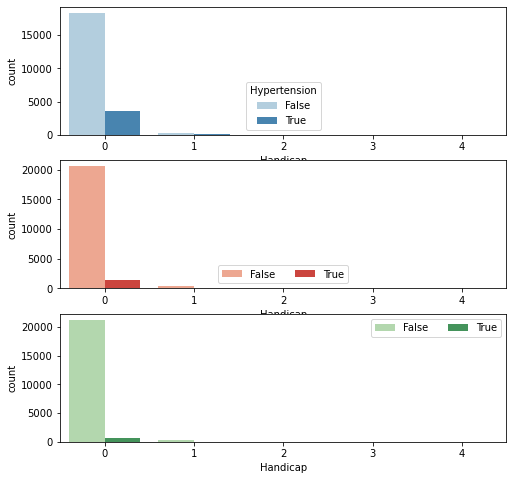

In [30]:
# plotting an interplay between handicap vs hypertension, diabetes and Alcoholism

# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: Handicapped vs Hypertension
plt.subplot(3, 1, 1)
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'Hypertension', palette = 'Blues')

# subplot 2: Handicapped vs. Diabetes
ax = plt.subplot(3, 1, 2)
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'Diabetes', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: Handicapped vs. Alcoholism, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = Did_Not_show_up, x = 'Handicap', hue = 'Alcoholism', palette = 'Greens')
ax.legend(loc = 1, ncol = 2);
 # re-arrange legend to remove overlapping

From the above countplot. Its clearly shown that a greater percentage of the population are not handicapped. These Non handicapped individuals also are not really hypertensive, Diabetic and alcoholics. Meaning that these indivuals are healthy with reference to this particular illnesses. Just a small number of the population,less than 30% to be precise are hypertensive or diabetic and Alcoholics

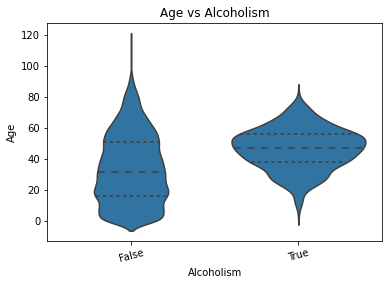

In [31]:
# plotting Age vs Alcoholism

base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=Did_Not_show_up, x='Alcoholism', y='Age', color=base_color, inner='quartile').set(title ='Age vs Alcoholism')
plt.xticks(rotation=15);

From this violin plot, we can see that Ages increasing from 40 to 60 has the higher number of alcoholics for the population that is true for alcohol. With age 50 having the highest number of alcoholics.  

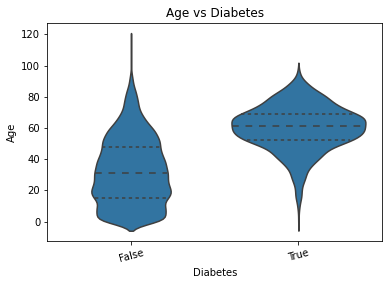

In [32]:
#plotting Age vs diabetes

base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=Did_Not_show_up, x='Diabetes', y='Age', color=base_color, inner='quartile').set(title ='Age vs Diabetes')
plt.xticks(rotation=15);

The diabetic population increases from Age 50 to 70. With the highest diabetic patients around Age 60. This can actually be a great factor contributing to them not showing up at the hospital.

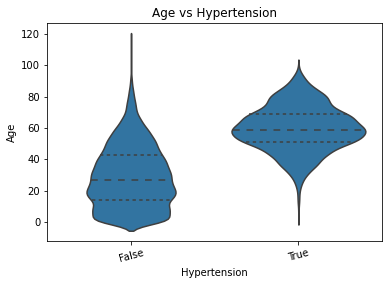

In [33]:
# plotting Age vs hypertension

base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=Did_Not_show_up, x='Hypertension', y='Age', color=base_color, inner='quartile').set(title ='Age vs Hypertension')
plt.xticks(rotation=15);

> The hypertensive population increases from Age 40 to 70. With the highest hypertensive population around Age 60. 

### **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

> A greater percentage of the population are not beneficaries of the bolsa scholarship program, neither are they handicapped. Not having access to financial funds could be a great contributing factor for not showing up for their appointments. 

> It can also be seen that these larger non handicapped population also did not receive the SMS, this is also another factor.

### **Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

> Looking at the distributions between Age and the diseases (Diabetes, Alcoholism and Hypertension), its obvious this diseases and addiction thrive around people from Age 40 and above. With some of them being dominant around age 50 to 60. This could be a great factor that can affect the patients thereby causing them not to show up for their apppointments. We will still look deeper into their interractions with other variables

## **Multivariate Exploration**

The main thing I want to explore in this part of the analysis is how the three categorical variables interplay with the numeric variable Age.

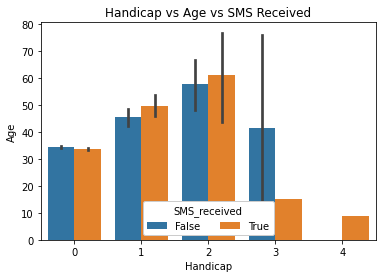

In [34]:
# plotting a barplot to show the relationship between Handicap, Age, and sms received
ax = sns.barplot(data = Did_Not_show_up, x = 'Handicap', y = 'Age', hue = 'SMS_received')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'SMS_received')
ax.set(title='Handicap vs Age vs SMS Received');

> Those without disability, their age spans from 0 to 35, and they have an almost equal distribution of SMS received, meaning that half of the population received and half did not receive the sms. Those with 1 disability, their age spans from 0 to 51, and they also have an almost equal ditributution of sms received. Suprisingly those with 2 forms of disability received more SMS than others. For those with 3 and 4 disability, more than half of their population did not receive the sms. 

> Receiving sms is an important factor because if you do not receive the sms, you wont know that you v been scheduled for an appointment, thererby not showing up. So lets us find out why some persons received the sms but yet did not show up for their appointment.

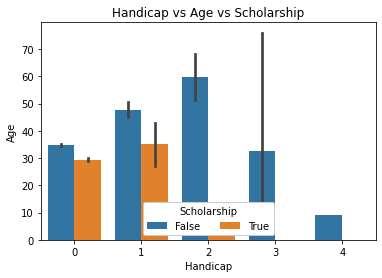

In [35]:
# plotting a barplot to show the relationship between Handicap, Age, and Scholarship
ax = sns.barplot(data = Did_Not_show_up, x = 'Handicap', y = 'Age', hue = 'Scholarship')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Scholarship');
ax.set(title='Handicap vs Age vs Scholarship');

In the previous barchart we noticed those with 2 disabilities received more sms but still did not show up for their appointment. It is evident in this barchart that more than 70% of the level 2 population (those with 2 disabilities) are not beneficiaries of the scholarship. Patients with 3 or 4 disability are not even benficiaries of the bolsa scholarship program, not one of them. Those with 1 or 2 disability still has quite a number of them who are also not beneficiaries of the scholarship program. 

### **Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

> I extended my investigation by further looking at the impact os Age on Handicap, SMS received and scholarship features. The multivariate exploration here showed that the patient popualtion with 1 or 2 disability had an equal distribution of SMS received. For those with more than 2 disabilities, more tha half of their population did ot receive the sms. Looking deeper at the multivariate relationship with scholarship received. its clearly seen here, that a good number of these population from all levels of disability are not not beneficiaries of the bolsa scholarship program.



### **Were there any interesting or surprising interactions between features?**

> Looking at the barchart of the relationship between, Age, Handicap and scholarship, it was suprising to see that patients with 3 or 4 disability are not even beneficiaries of the scholarship program. No one on this level of disability is a beneficiary.

### **Conclusions** : From the above data analysis, we can deduce that;

> Most persons did not receive the sms (more than 50% of the population). Hence contributing to their not showing up to the appointment.

> The analysis also showed that few persons are handicapped, hence could not make it to their appointment.

> Also more than 75% of the population are not beneficiaries of the Bolsa Familia program, hence they also couldn't make it to the appointment due to financial constraints.

> From the analysis we can see that those with 2 disabilities received more sms, yet did not show up for their appointment. This is due to the fact that more than 70% of the level 2 population are not beneficiaries of the scholarship. Patients with 3 or 4 disability also are not even benficiaries of the scholarship program. In order to be eligible for the bolsa scholarship program, parents must ensure children attend school and get vaccinated. but for this people with more than 2 disabilities propbably could not even go to school because of their condition, hence making them not to be part of the scholarship program, this in turn deter them from showing up for their appointments.

> The patient population above the age of 40, have a lot patients suffering from hypertension and diabetes, and also most of them were alcoholics. This factors can really contribute to their not showing up for their appointments.

> Finally we'v clearly seen that even though some persons received the sms, they still did NOT show up for the appointment because they are either handicapped, suffering from either of the illnesses or not benefitting from the scholarship program.

> Before I started the exploration process, I did some data wrangling which involves; dropping columns which were not relevant to my analysis, renaming cloumns and fixing datatypes. Then i filtered the dataset due to the fact that my interest lies in the patient population that did not show up for their appointment.

> Afterwards I introduced each of these variables one by one. To start, I used a histogram to show their various distributions. I then explored further by looking at the pairwise and multivariate relationship between these variables using barchart and violin plots.